### Importing Libraries
This cell imports necessary libraries for the project:
- **PyTorch (`torch`)**: The main library for building and training neural networks.
- **Submodules (`nn`, `optim`)**: For defining network layers and optimization algorithms.
- **Torchvision**: For handling image data, including datasets, transformations, and models.
- **Matplotlib**: For plotting and visualizing data.
- **NumPy**: For numerical operations.

In [ ]:
# Importing necessary libraries for PyTorch, dataset handling, and visualization
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models

### Setting the Device
This cell defines the device (GPU or CPU) to be used for training the neural network. If a CUDA-capable GPU is available, it's used for faster computation; otherwise, the CPU is used.

In [ ]:
# Define the device for training the model (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Data Transformations
This cell sets up the transformations for the input images. The transformations include resizing images to a specific size, converting them to tensor format (which is required by PyTorch), and normalizing the pixel values.

In [ ]:
# Define transformations for the input data (resizing to 224x224, converting to tensor, normalization)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # Randomly flip the input horizontally (data augmentation).
    transforms.Resize(224),  # Resize images to 224x224 pixels
    transforms.ToTensor(),   # Convert the data to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to have mean 0.5 and standard deviation 0.5
])

### Loading the Dataset
This cell loads the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes. The dataset is split into training and testing sets. Data loaders are also defined for iterating over these sets in batches.

In [ ]:
# Load CIFAR-10 dataset (training and testing) with defined transformations
# - 'train=True' loads the training dataset.
# - 'train=False' loads the testing dataset.
# - 'download=True' downloads the dataset if not already downloaded.
train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define data loaders for training and testing sets
# - 'batch_size' determines the number of samples in each batch.
# - 'shuffle=True' shuffles the training data to improve model training.
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


### Model Preparation
This cell involves loading a pre-trained AlexNet model, a popular neural network architecture for image classification. The final layer of the model is modified to classify 10 classes of the CIFAR-10 dataset. The loss function is set to Cross-Entropy Loss, and the optimizer is Stochastic Gradient Descent (SGD) with specified learning rate and momentum.

In [ ]:
# Create a AlexNet model pre-trained
alexnet = models.alexnet(pretrained=True)
# Check the Alexnet model
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# Modify the classifier layer for CIFAR-10.
# changes the last fully connected layer (classifier) to output 10 classes for CIFAR-10.
alexnet.classifier[6] = nn.Linear(4096, 10)
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# Move the modified AlexNet model to the specified device (e.g., GPU if available).
alexnet.to(device)

# Define the loss function (CrossEntropyLoss) for classification
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Stochastic Gradient Descent - SGD) for model parameters
optimizer = optim.SGD(alexnet.parameters(), lr=0.01, momentum=0.9)

### Training the Model
This part of the code is responsible for training the neural network. It involves the following key steps:
- **Setting Number of Epochs**: `num_epochs` is defined to specify the number of times the entire dataset is passed through the network.
- **Training Loop**: For each epoch, the code iterates over the training data in mini-batches. In each iteration:
  - The data is moved to the specified device (GPU or CPU).
  - Gradients are reset using `optimizer.zero_grad()`.
  - A forward pass is performed to compute the output.
  - Loss is computed and backpropagation is performed.
  - The optimizer updates the model parameters.
  - The running loss is calculated and printed every 100 mini-batches for monitoring.

### Testing the Model and Calculating Accuracy
After each training epoch, the model is evaluated on the test dataset:
- The gradients are not computed in this phase (`torch.no_grad()`).
- The model makes predictions on the test dataset and the accuracy is calculated by comparing these predictions with the true labels.
- The accuracy is stored in `accuracy_history` for visualization.

In [ ]:
# Train the model
num_epochs = 5  # Number of training epochs
accuracy_history = []  # To store accuracy history during training

# Loop over the specified number of epochs
for epoch in range(num_epochs):
    running_loss = 0.0  # Initialize the running loss for this epoch

    # Loop over mini-batches of training data
    for i, data in enumerate(train_loader, 1):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients to avoid accumulation
        optimizer.zero_grad()

        # Forward pass: Compute the predictions and loss
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)

        # Backward pass: Compute gradients and update model parameters
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print('[Epoch %d, Batch %5d] Loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    # Test the model and calculate accuracy
    correct = 0  # Initialize the number of correctly predicted samples
    total = 0    # Initialize the total number of samples

    with torch.no_grad():
        # Loop over mini-batches of test data
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass: Compute the model's predictions
            outputs = alexnet(images)

            # Use the "torch.max" function to get the index of the maximum predicted value
            _, predicted = torch.max(outputs.data, 1)

            # Update the total count of samples
            total += labels.size(0)

            # Count the number of correctly predicted samples
            correct += (predicted == labels).sum().item()

    # Calculate the accuracy as the percentage of correctly predicted samples
    accuracy = 100 * correct / total

    # Append the accuracy to the accuracy history list
    accuracy_history.append(accuracy)

    # Print the accuracy of the network on the test images
    print('Accuracy of the network on the test images: %d %%' % accuracy)

[Epoch 1, Batch   100] Loss: 1.158
[Epoch 1, Batch   200] Loss: 0.688
[Epoch 1, Batch   300] Loss: 0.606
Accuracy of the network on the test images: 82 %
[Epoch 2, Batch   100] Loss: 0.445
[Epoch 2, Batch   200] Loss: 0.432
[Epoch 2, Batch   300] Loss: 0.416
Accuracy of the network on the test images: 85 %
[Epoch 3, Batch   100] Loss: 0.351
[Epoch 3, Batch   200] Loss: 0.338
[Epoch 3, Batch   300] Loss: 0.339
Accuracy of the network on the test images: 86 %
[Epoch 4, Batch   100] Loss: 0.269
[Epoch 4, Batch   200] Loss: 0.273
[Epoch 4, Batch   300] Loss: 0.283
Accuracy of the network on the test images: 86 %
[Epoch 5, Batch   100] Loss: 0.226
[Epoch 5, Batch   200] Loss: 0.238
[Epoch 5, Batch   300] Loss: 0.246
Accuracy of the network on the test images: 87 %


### Plotting the Accuracy Over Epochs
This section plots the accuracy of the model over the training epochs:
- A line plot is created using `matplotlib` to visualize the accuracy over epochs.
- This helps in understanding the learning progress and diagnosing issues like overfitting or underfitting.

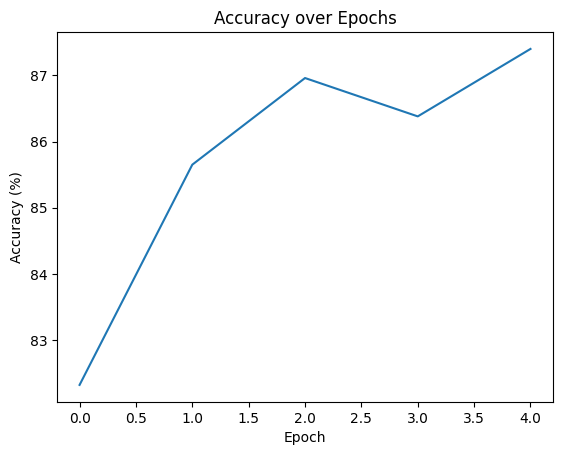

In [ ]:
# Plot the accuracy over epochs
plt.plot(accuracy_history)  # Plot the accuracy values stored in accuracy_history
plt.title('Accuracy over Epochs')  # Set the title of the plot
plt.xlabel('Epoch')  # Label for the x-axis (epochs)
plt.ylabel('Accuracy (%)')  # Label for the y-axis (accuracy percentage)
plt.show()  # Display the plot